### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja= sum(loja['Preço'])
faturamento_loja2= sum(loja2['Preço'])
faturamento_loja3= sum(loja3['Preço'])
faturamento_loja4= sum(loja4['Preço'])
print(f"Faturamento da Loja 1:  R${faturamento_loja:,.2f}")
print(f"Faturamento da Loja 2:  R${faturamento_loja2:,.2f}")
print(f"Faturamento da Loja 3:  R${faturamento_loja3:,.2f}")
print(f"Faturamento da Loja 4:  R${faturamento_loja4:,.2f}")



Faturamento da Loja 1:  R$1,534,509.12
Faturamento da Loja 2:  R$1,488,459.06
Faturamento da Loja 3:  R$1,464,025.03
Faturamento da Loja 4:  R$1,384,497.58


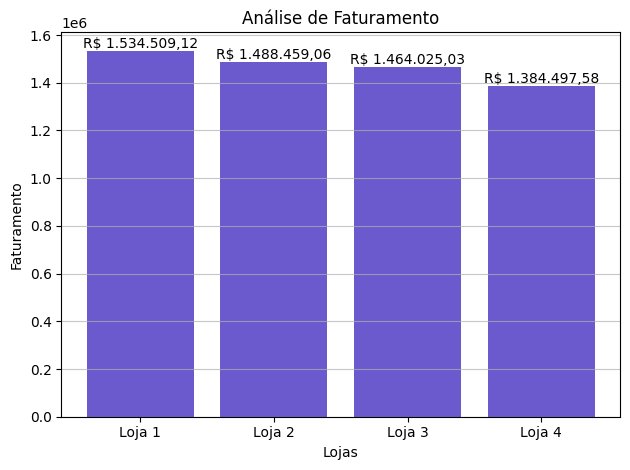

In [ ]:
import matplotlib.pyplot as plt
x = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
y = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

fig, ax = plt.subplots()

barras = ax.bar(x, y, color='slateblue')

for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'R$ {altura:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
        ha='center',
        va='bottom',
        fontsize=10

    )

ax.set_xlabel('Lojas')
ax.set_ylabel('Faturamento')
ax.set_title('Análise de Faturamento')
ax.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [ ]:
venda_categoria_loja = loja['Categoria do Produto'].value_counts()
venda_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
venda_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
venda_categoria_loja4 = loja4['Categoria do Produto'].value_counts()
print(f"Vendas por categoria da Loja 1: \n {venda_categoria_loja}\n")
print(f"Vendas por categoria da Loja 2: \n {venda_categoria_loja2}\n")
print(f"Vendas por categoria da Loja 3: \n {venda_categoria_loja3}\n")
print(f"Vendas por categoria da Loja 4: \n {venda_categoria_loja4}\n")



Vendas por categoria da Loja 1: 
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Vendas por categoria da Loja 2: 
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Vendas por categoria da Loja 3: 
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Vendas por categoria da Loja 4: 
 Categoria do Produto
mov

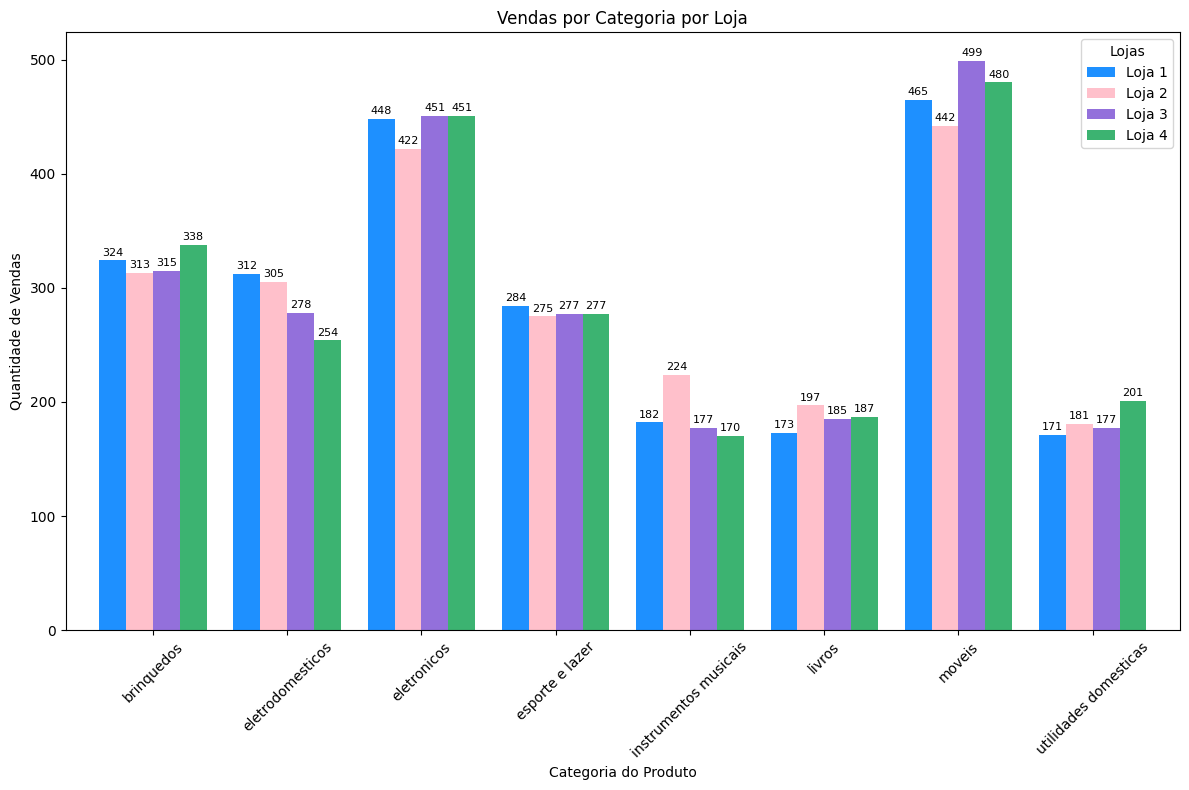

In [ ]:
df = pd.DataFrame({
    'Loja 1': venda_categoria_loja,
    'Loja 2': venda_categoria_loja2,
    'Loja 3': venda_categoria_loja3,
    'Loja 4': venda_categoria_loja4
}).fillna(0)

cores = ['dodgerblue', 'pink', 'mediumpurple', 'mediumseagreen']

ax = df.plot(kind='bar', figsize=(12,8), color=cores,width=0.8 )

plt.title('Vendas por Categoria por Loja')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Categoria do Produto')
plt.xticks(rotation=45)
plt.legend(title='Lojas')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao_loja = sum(loja['Avaliação da compra']) / len(loja['Avaliação da compra'])
media_avaliacao_loja2 = sum(loja2['Avaliação da compra']) / len(loja2['Avaliação da compra'])
media_avaliacao_loja3 = sum(loja3['Avaliação da compra']) / len(loja3['Avaliação da compra'])
media_avaliacao_loja4 = sum(loja4['Avaliação da compra']) / len(loja4['Avaliação da compra'])
print(f"Média de avaliação da loja 1: {media_avaliacao_loja:.2f}")
print(f"Média de avaliação da loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de avaliação da loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de avaliação da loja 4: {media_avaliacao_loja4:.2f}")

Média de avaliação da loja 1: 3.98
Média de avaliação da loja 2: 4.04
Média de avaliação da loja 3: 4.05
Média de avaliação da loja 4: 4.00


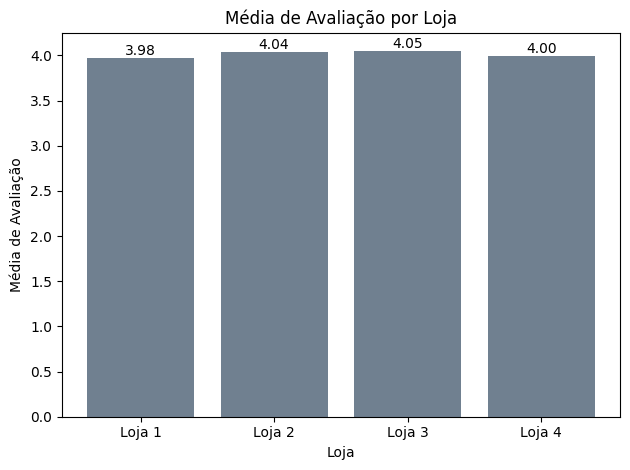

In [ ]:
x = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
y = [media_avaliacao_loja, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
fig, ax = plt.subplots()

barras = ax.bar(x, y, color='slateblue')
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{altura:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.bar(x, y, color='slategray', label='Média de Avaliação por Loja')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
mais_vendidos_loja = loja['Produto'].value_counts().head()
menos_vendidos_loja = loja['Produto'].value_counts(ascending=True).head()

mais_vendidos_loja2 = loja2['Produto'].value_counts().head()
menos_vendidos_loja2 = loja2['Produto'].value_counts(ascending=True).head()

mais_vendidos_loja3 = loja3['Produto'].value_counts().head()
menos_vendidos_loja3 = loja3['Produto'].value_counts(ascending=True).head()

mais_vendidos_loja4 = loja4['Produto'].value_counts().head()
menos_vendidos_loja4 = loja4['Produto'].value_counts(ascending=True).head()
print(f"Produtos mais vendido da Loja 1 :\n{mais_vendidos_loja}\n")
print(f"Produtos menos vendido da Loja 1 :\n{menos_vendidos_loja}\n")

print(f"Produtos mais vendido da Loja 2 :\n{mais_vendidos_loja2}\n")
print(f"Produtos menos vendido da Loja 2 :\n{menos_vendidos_loja2}\n")

print(f"Produtos mais vendido da Loja 3 :\n{mais_vendidos_loja3}\n")
print(f"Produtos menos vendido da Loja 3 :\n{menos_vendidos_loja3}\n")

print(f"Produtos mais vendido da Loja 4 :\n{mais_vendidos_loja4}\n")
print(f"Produtos menos vendido da Loja 4 :\n{menos_vendidos_loja4}\n")

Produtos mais vendido da Loja 1 :
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Produtos menos vendido da Loja 1 :
Produto
Headset              33
Celular ABXY         33
Panela de pressão    35
Pandeiro             36
Mochila              39
Name: count, dtype: int64

Produtos mais vendido da Loja 2 :
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Produtos menos vendido da Loja 2 :
Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Poltrona             35
Fone de ouvido       37
Name: count, dtype: int64

Produtos mais vendido da Loja 3 :
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Produtos menos vendido 

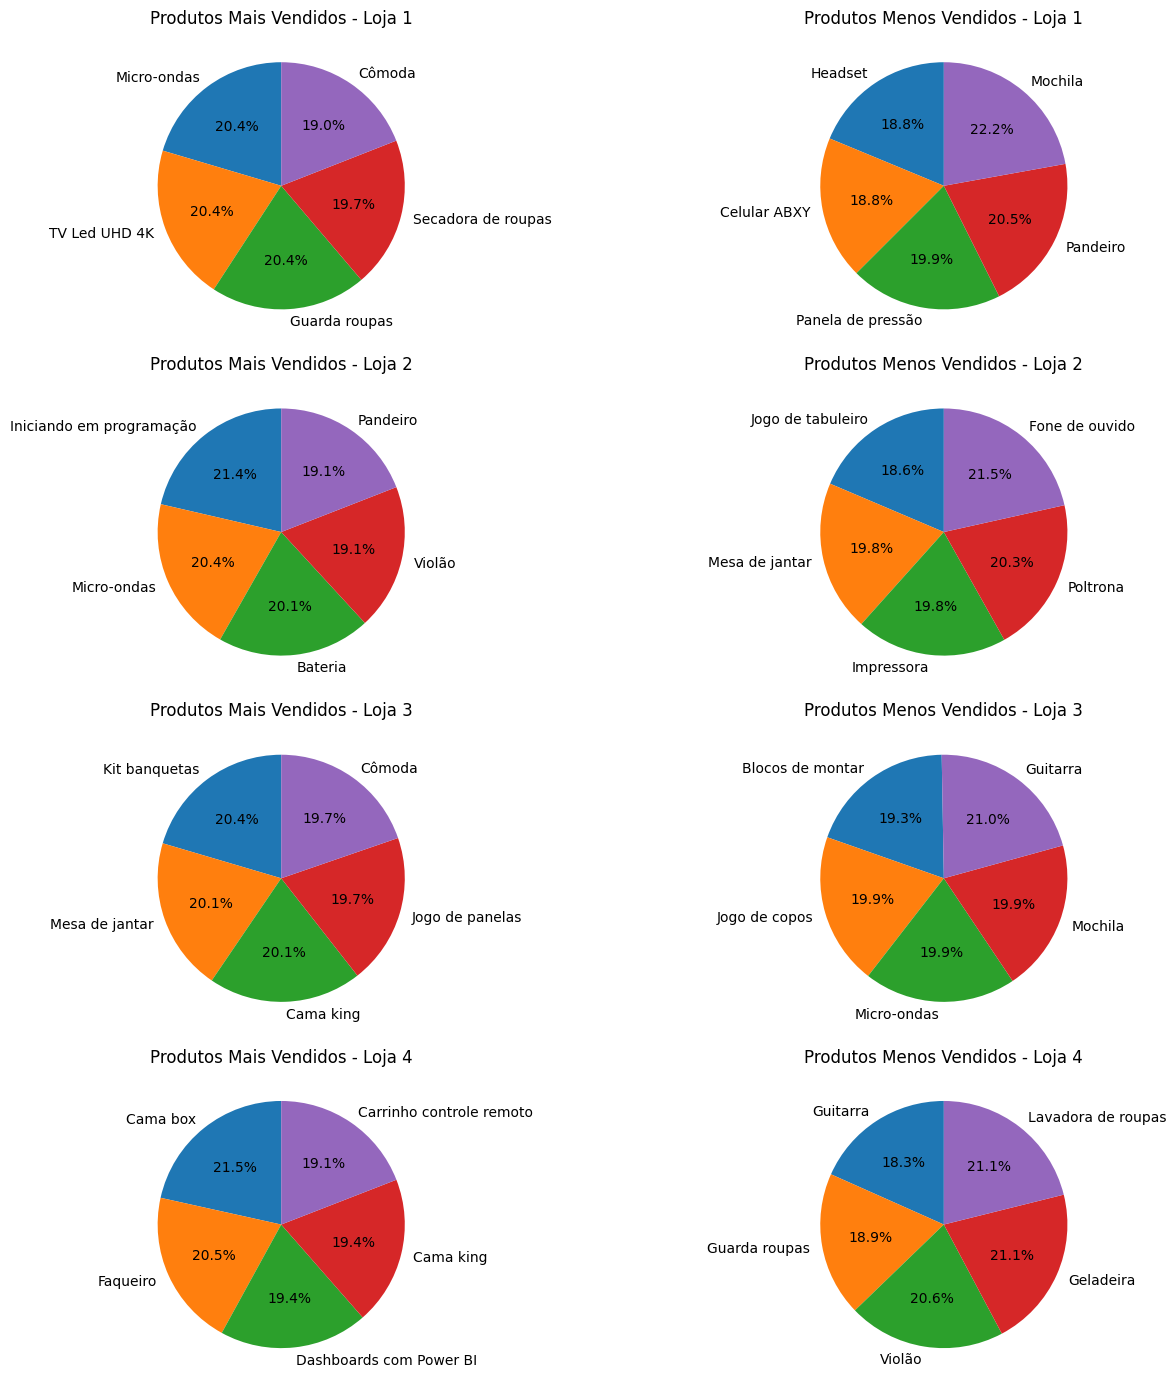

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(14, 14))

# Gráfico de pizza para Loja 1
axs[0, 0].pie(mais_vendidos_loja.values, labels=mais_vendidos_loja.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Produtos Mais Vendidos - Loja 1')

axs[0, 1].pie(menos_vendidos_loja.values, labels=menos_vendidos_loja.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Produtos Menos Vendidos - Loja 1')

# Gráfico de pizza para Loja 2
axs[1, 0].pie(mais_vendidos_loja2.values, labels=mais_vendidos_loja2.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Produtos Mais Vendidos - Loja 2')

axs[1, 1].pie(menos_vendidos_loja2.values, labels=menos_vendidos_loja2.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Produtos Menos Vendidos - Loja 2')

# Gráfico de pizza para Loja 3
axs[2, 0].pie(mais_vendidos_loja3.values, labels=mais_vendidos_loja3.index, autopct='%1.1f%%', startangle=90)
axs[2, 0].set_title('Produtos Mais Vendidos - Loja 3')

axs[2, 1].pie(menos_vendidos_loja3.values, labels=menos_vendidos_loja3.index, autopct='%1.1f%%', startangle=91)
axs[2, 1].set_title('Produtos Menos Vendidos - Loja 3')

# Gráfico de pizza para Loja 4
axs[3, 0].pie(mais_vendidos_loja4.values, labels=mais_vendidos_loja4.index, autopct='%1.1f%%', startangle=90)
axs[3, 0].set_title('Produtos Mais Vendidos - Loja 4')

axs[3, 1].pie(menos_vendidos_loja4.values, labels=menos_vendidos_loja4.index, autopct='%1.1f%%', startangle=90)
axs[3, 1].set_title('Produtos Menos Vendidos - Loja 4')

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
loja_frete_medio = loja['Frete'].mean()
loja2_frete_medio = loja2['Frete'].mean()
loja3_frete_medio = loja3['Frete'].mean()
loja4_frete_medio = loja4['Frete'].mean()
print(f"Frete médio da loja 1: {loja_frete_medio}")
print(f"Frete médio da loja 2: {loja2_frete_medio}")
print(f"Frete médio da loja 3: {loja3_frete_medio}")
print(f"Frete médio da loja 4: {loja4_frete_medio}")



Frete médio da loja 1: 34.69180491551149
Frete médio da loja 2: 33.62194065817927
Frete médio da loja 3: 33.07446427411743
Frete médio da loja 4: 31.278997081841727


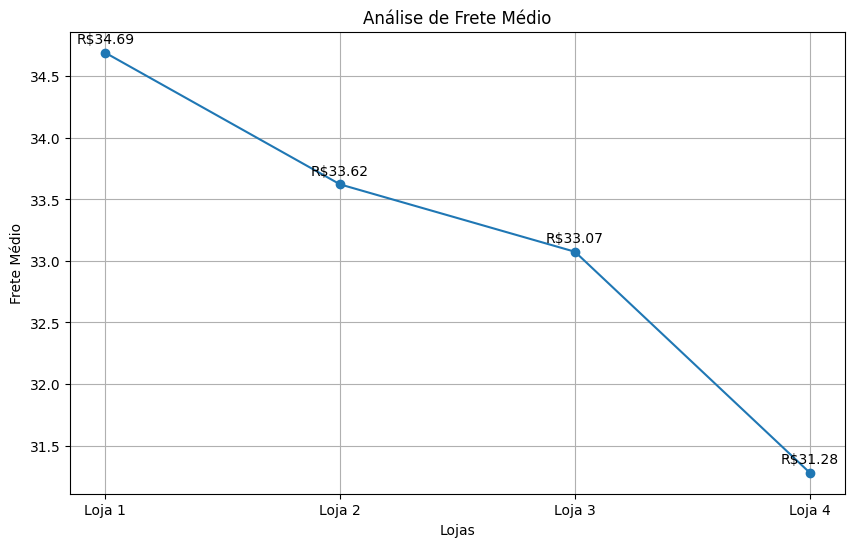

In [ ]:
x = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
y = [loja_frete_medio, loja2_frete_medio, loja3_frete_medio, loja4_frete_medio]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Análise de Frete Médio')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio')
plt.grid(True)

for i, valor in enumerate(y):
    plt.text(x[i], valor + 0.05, f'R${valor:.2f}', ha='center', va='bottom')

plt.show()

# **Relatório: Análise de Desempenho das Lojas e Recomendação de Venda**

## **⏩Introdução**

Este relatório tem como objetivo apoiar a decisão do Senhor João sobre qual de suas quatro lojas deve ser vendida. A análise foi conduzida utilizando dados de cada loja, sejam eles de faturamento, vendas por categoria, média de avaiações, produtos mais e menos vendidos e o frete médio. Nosso foco é identificar qual loja traz menos retorno financeiro e apresenta menor potencial de crescimento, para garantir que a operação continue mais rentável e eficiente e que o Senhor João possa vender a loja para investir em um novo négocio.


## **⏩Análises Realizadas**

**1.   Análise do faturamento**


*   Loja 1: R$1.534.509,12

*   Loja 2: R$1.488.459,06

*   Loja 3: R$1.464.025,03

*   Loja 4: R$1.384.497,58

**📊 Detalhamento:**

A loja que possui o melhor faturamento foi a Loja 1, enquanto que possui o menor faturamento foi a loja 4.

---

**2.   Vendas por Categoria**


*   Todas as lojas possuem como categorias mais vendidas moveis e eletrônicos, e não tem uma diferença siginificativa da quantidade de uma loja para outra.
*   As categorias menos vendidas são livros, instrumentos musicais e utilidades domésticas.

---


**3.   Média de Avaliação das Lojas ⭐**


*   Loja 1: ⭐3.98

*   Loja 2: ⭐4.04

*   Loja 3: ⭐4.05

*   Loja 4: ⭐4.0

**📊 Detalhamento:**

A média de avaliações de todas as lojas são parecidas e não possuem uma diferença significante. A que possui a maior avaliação dentre todas é a loja 3 e a menor avaiação seria a loja 1.

---

**4.   Produtos Mais e Menos Vendidos**

*   Loja 1 se destaca com um portfólio forte em móveis e eletrodomésticos de alto valor, como TVs e micro-ondas, o que justifica seu alto faturamento. Seus produtos menos vendidos são, em geral, itens de tecnologia pessoal e brinquedos.

*   Loja 2 tem um perfil mais diversificado, com boas vendas de cursos online e instrumentos musicais, mas menor desempenho em móveis e equipamentos de informática.

*   Loja 3 é sólida no segmento de móveis e utilidades domésticas, mantendo vendas consistentes em produtos de alto ticket, como camas king e kits de banquetas.

*   Loja 4 apresenta um portfólio disperso, sem um foco claro, e enfrenta dificuldades para vender produtos de alto valor, como geladeiras e lavadoras, além de baixo desempenho em categorias importantes.

---
**5.   Frete Médio por Loja**

*   Loja 1: R$34,69

*   Loja 2: R$33,62

*   Loja 3: R$33,07

*   Loja 4: R$31,28

**📊 Detalhamento:**
A loja que possui o frete médio mais alto é loja 1, a que mais fatura, a loja 2 e 3 tem fretes médios parecidos, já a loja 4 é a que possui o frete com valor mais baixo dentre todas.

---
##**⏩Conclusão**
🔷 Recomendação: Fechar a loja 4.

Com base na análise dos dados de faturamento, vendas por categoria, média de avaliação, produtos mais e menos vendidos e frete médio, a recomendação é que o Sr. João venda a Loja 4. As métricas mostram que a Loja 4 possui o menor faturamento entre todas, mesmo tendo o frete médio mais baixo. Além disso, os produtos de maior valor, que poderiam impulsionar o faturamento, têm baixa saída, o que gera ainda mais gastos com logística e armazenamento. Embora a média de avaliações e a venda por categoria não apresentem diferenças significativas entre as lojas, esses fatores não foram determinantes. Com base nos demais indicadores analisados, a Loja 4 se mostra a opção mais adequada para ser vendida, permitindo que o Sr. João invista em um novo negócio.


# Extra - Análise de Desempenho Geográfico

 **Concentração Geográfica das vendas de todas as Lojas**

In [ ]:
import plotly.express as px

df = pd.concat([
    loja.assign(loja='Loja 1'),
    loja2.assign(loja='Loja 2'),
    loja3.assign(loja='Loja 3'),
    loja4.assign(loja='Loja 4')
], ignore_index=True)



fig = px.scatter(df, x='lon', y='lat', color='loja', title='Concentração Geográfica das vendas', labels={'lon': 'Longitude', 'lat': 'Latitude'})

fig.update_layout(
    title={
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show()

 **Concentração Geográfica das vendas de cada Loja**

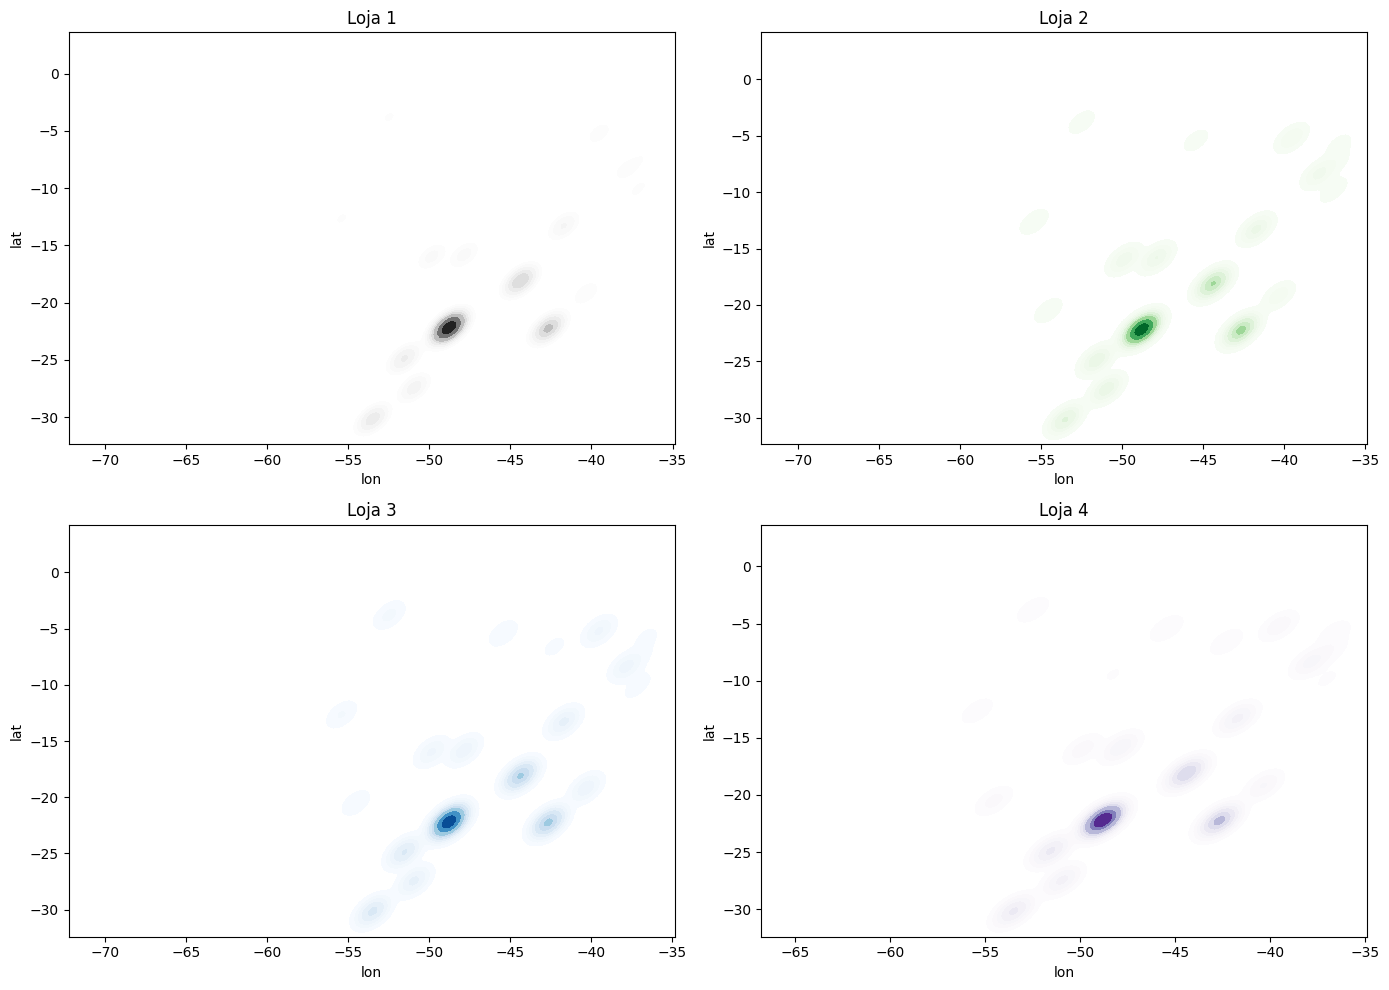

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loja 1
sns.kdeplot(
    x=loja["lon"], y=loja["lat"], cmap="Greys", fill=True, bw_adjust=0.5, ax=axs[0, 0]
)
axs[0, 0].set_title("Loja 1")

# Loja 2
sns.kdeplot(
    x=loja2["lon"], y=loja2["lat"], cmap="Greens", fill=True, bw_adjust=0.5, ax=axs[0, 1]
)
axs[0, 1].set_title("Loja 2")

# Loja 3
sns.kdeplot(
    x=loja3["lon"], y=loja3["lat"], cmap="Blues", fill=True, bw_adjust=0.5, ax=axs[1, 0]
)
axs[1, 0].set_title("Loja 3")

# Loja 4
sns.kdeplot(
    x=loja4["lon"], y=loja4["lat"], cmap="Purples", fill=True, bw_adjust=0.5, ax=axs[1, 1]
)
axs[1, 1].set_title("Loja 4")

plt.tight_layout()
plt.show()


 **Concentração Geográfica das vendas em mapa por camadas**

In [ ]:
import folium
from folium.plugins import HeatMap


m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

loja1_layer = folium.FeatureGroup(name='Loja 1')
HeatMap(loja[['lat', 'lon']].values.tolist()).add_to(loja1_layer)
loja1_layer.add_to(m)

loja2_layer = folium.FeatureGroup(name='Loja 2')
HeatMap(loja2[['lat', 'lon']].values.tolist()).add_to(loja2_layer)
loja2_layer.add_to(m)

loja3_layer = folium.FeatureGroup(name='Loja 3')
HeatMap(loja3[['lat', 'lon']].values.tolist()).add_to(loja3_layer)
loja3_layer.add_to(m)

loja4_layer = folium.FeatureGroup(name='Loja 4')
HeatMap(loja4[['lat', 'lon']].values.tolist()).add_to(loja4_layer)
loja4_layer.add_to(m)

folium.LayerControl().add_to(m)
m
